<a href="https://colab.research.google.com/github/hargurjeet/Lending-Club-CaseStudy/blob/main/Lending_Club_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
! git clone https://github.com/hargurjeet/Lending-Club-CaseStudy.git

Cloning into 'Lending-Club-CaseStudy'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 39 (delta 17), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (39/39), done.


In [3]:
with zipfile.ZipFile("/content/Lending-Club-CaseStudy/loan.zip","r") as zip_ref:
    zip_ref.extractall("/content/Lending-Club-CaseStudy/")

In [4]:
file_path = r'/content/Lending-Club-CaseStudy/loan.csv'
df = pd.read_csv(file_path)
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [6]:
df1 = pd.read_excel('/content/Lending-Club-CaseStudy/Data_Dictionary.xlsx')
df1

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...
114,zip_code,The first 3 numbers of the zip code provided b...
115,NaN,NaN


In [7]:
def view_all(df):
  pd.set_option('display.max_rows', None)
  pd.set_option('max_columns', None)
  pd.set_option('display.max_colwidth', None)
  return df.style.set_properties(**{'text-align': 'left'})

view_all(df1)

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [9]:
# Checking the missing values
df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [10]:
# Funtion to remove the columns with high missing values
def columns_with_high_missing_values_removed(df):
  missing_percent = (df.isnull().sum()/len(df))*100
  for feature, values in zip(missing_percent.index, missing_percent):
    if values >= 90:
      missing_percent.drop(feature, inplace=True)
  return missing_percent

df2 = columns_with_high_missing_values_removed(df)
df2

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [11]:
df2.shape

(55,)

In [12]:
# Filtering records where missing values are neither too low and neither too high
print(df2.loc[lambda x:(x<70) & (x>10)])

## droping these features for now
df3 = df2.drop(['desc', 'mths_since_last_delinq'])
df3.shape


desc                      32.580507
mths_since_last_delinq    64.662487
dtype: float64


(53,)

In [13]:
# Filtering columns with low missing values
low_missing_values_col = df3.loc[lambda x:(x<10) & (x>0)].sort_values(ascending=False).index
low_missing_values_col

Index(['emp_title', 'emp_length', 'pub_rec_bankruptcies', 'last_pymnt_d',
       'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'revol_util',
       'tax_liens', 'title', 'last_credit_pull_d'],
      dtype='object')

In [14]:
## droping these features for now
df4 = df3.drop(low_missing_values_col)
df4.shape

(43,)

In [17]:
pd.reset_option('all')
pd.set_option('max_columns', None)
df5 = df[df4.index]
df5.head(2)

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,171.62,1,INDIVIDUAL,0,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,119.66,1,INDIVIDUAL,0,0


In [18]:
df5.shape

(39717, 43)

In [19]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

In [20]:
df5.select_dtypes(include='object')

,term,int_rate,grade,sub_grade,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,earliest_cr_line,initial_list_status,application_type
0,36 months,10.65%,B,B2,RENT,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,860xx,AZ,Jan-85,f,INDIVIDUAL
1,60 months,15.27%,C,C4,RENT,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,309xx,GA,Apr-99,f,INDIVIDUAL
2,36 months,15.96%,C,C5,RENT,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,606xx,IL,Nov-01,f,INDIVIDUAL
3,36 months,13.49%,C,C1,RENT,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,917xx,CA,Feb-96,f,INDIVIDUAL
4,60 months,12.69%,B,B5,RENT,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,972xx,OR,Jan-96,f,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,36 months,8.07%,A,A4,MORTGAGE,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,802xx,CO,Nov-90,f,INDIVIDUAL
39713,36 months,10.28%,C,C1,RENT,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,274xx,NC,Dec-86,f,INDIVIDUAL
39714,36 months,8.07%,A,A4,MORTGAGE,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,017xx,MA,Oct-98,f,INDIVIDUAL
39715,36 months,7.43%,A,A2,MORTGAGE,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,208xx,MD,Nov-88,f,INDIVIDUAL


## EDA

In [30]:
(df5.loan_status.value_counts()/ len(df5))*100

Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: loan_status, dtype: float64

In [33]:
df5.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

Text(0.5, 1.0, 'Loan Statuses')

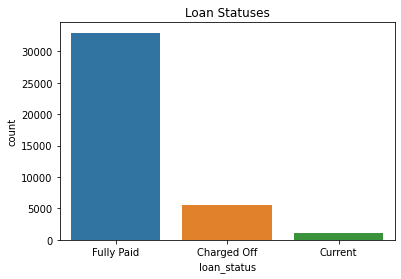

In [32]:
sns.countplot(x=df5.loan_status)
plt.title('Loan Statuses')

14 % or around 6K loan applicants has defaulted on the loans. Let us filter out these applicants in our analysis

In [34]:
charged_off_applicants = df5[df5.loan_status=='Charged Off']
charged_off_applicants.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,4,f,0.0,0.0,1008.71,1008.71,456.46,435.17,0.0,117.08,1.1100,119.66,1,INDIVIDUAL,0,0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,OWN,40000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,958xx,CA,5.55,0,Apr-04,2,11,0,5210,13,f,0.0,0.0,646.02,646.02,162.02,294.94,0.0,189.06,2.0900,152.39,1,INDIVIDUAL,0,0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,RENT,15000.0,Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,other,774xx,TX,18.08,0,Sep-04,0,2,0,9279,3,f,0.0,0.0,1476.19,1469.34,673.48,533.42,0.0,269.29,2.5200,121.45,1,INDIVIDUAL,0,0
12,1064687,1298717,9000,9000,9000.0,36 months,13.49%,305.38,C,C1,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,245xx,VA,10.08,0,Apr-04,1,4,0,10452,9,f,0.0,0.0,2270.70,2270.70,1256.14,570.26,0.0,444.30,4.1600,305.38,1,INDIVIDUAL,0,0
14,1069057,1303503,10000,10000,10000.0,36 months,10.65%,325.74,B,B2,RENT,100000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,other,951xx,CA,7.06,0,May-91,2,14,0,11997,29,f,0.0,0.0,7471.99,7471.99,5433.47,1393.42,0.0,645.10,6.3145,325.74,1,INDIVIDUAL,0,0


In [49]:
charged_off_applicants.annual_inc.value_counts()/len(charged_off_applicants)

60000.0     0.045495
50000.0     0.029145
40000.0     0.027723
30000.0     0.024702
36000.0     0.023281
              ...   
163400.0    0.000178
12600.0     0.000178
40512.0     0.000178
64500.0     0.000178
33990.0     0.000178
Name: annual_inc, Length: 1253, dtype: float64

In [50]:
df5[~(df5.loan_status=='Charged Off')].annual_inc.value_counts()/34090

60000.0     0.036638
50000.0     0.026195
40000.0     0.021121
45000.0     0.020651
75000.0     0.020593
              ...   
74028.0     0.000029
138257.0    0.000029
98320.0     0.000029
27993.0     0.000029
27376.0     0.000029
Name: annual_inc, Length: 4727, dtype: float64

Around 40% of these loan applicants were not verfied